In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [0]:
!wget -q www-us.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz

In [22]:
!tar -xvf spark-2.4.4-bin-hadoop2.7.tgz

spark-2.4.4-bin-hadoop2.7/
spark-2.4.4-bin-hadoop2.7/R/
spark-2.4.4-bin-hadoop2.7/R/lib/
spark-2.4.4-bin-hadoop2.7/R/lib/sparkr.zip
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/INDEX
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/html/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/html/R.css
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/html/00Index.html
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/aliases.rds
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/AnIndex
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/SparkR.rdx
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/SparkR.rdb
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/paths.rds
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/worker/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/worker/worker.R
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/worker/daemon.R
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/tests/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/tests/testthat/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/tests/testthat/te

In [0]:
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

In [0]:
iris = spark.read.csv('iris.csv', header=True, inferSchema=True)

In [52]:
iris.show()

+------------+-----------+------------+-----------+-------+
|sepal.length|sepal.width|petal.length|petal.width|variety|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|
|         5.4|        3.9|         1.7|        0.4| Setosa|
|         4.6|        3.4|         1.4|        0.3| Setosa|
|         5.0|        3.4|         1.5|        0.2| Setosa|
|         4.4|        2.9|         1.4|        0.2| Setosa|
|         4.9|        3.1|         1.5|        0.1| Setosa|
|         5.4|        3.7|         1.5|        0.2| Setosa|
|         4.8|        3.4|         1.6|        0.2| Setosa|
|         4.8|        3.0|         1.4|        0.1| Setosa|
|         4.3|        3.0|         1.1| 

In [0]:
from pyspark.sql import functions as F

In [0]:
iris = iris.withColumn("Class", F.when((iris["variety"] == "Setosa"), "Setosa").otherwise("Not Setosa")
                   
                   )

In [62]:
iris.show()

+-----+--------------------+---+---+---+---+-------+------+
|label|            features| sl| sw| pl| pw|variety| Class|
+-----+--------------------+---+---+---+---+-------+------+
|  1.0|[0.0,0.0,5.1,3.5,...|5.1|3.5|1.4|0.2| Setosa|Setosa|
|  1.0|[0.0,0.0,4.9,3.0,...|4.9|3.0|1.4|0.2| Setosa|Setosa|
|  1.0|[0.0,0.0,4.7,3.2,...|4.7|3.2|1.3|0.2| Setosa|Setosa|
|  1.0|[0.0,0.0,4.6,3.1,...|4.6|3.1|1.5|0.2| Setosa|Setosa|
|  1.0|[0.0,0.0,5.0,3.6,...|5.0|3.6|1.4|0.2| Setosa|Setosa|
|  1.0|[0.0,0.0,5.4,3.9,...|5.4|3.9|1.7|0.4| Setosa|Setosa|
|  1.0|[0.0,0.0,4.6,3.4,...|4.6|3.4|1.4|0.3| Setosa|Setosa|
|  1.0|[0.0,0.0,5.0,3.4,...|5.0|3.4|1.5|0.2| Setosa|Setosa|
|  1.0|[0.0,0.0,4.4,2.9,...|4.4|2.9|1.4|0.2| Setosa|Setosa|
|  1.0|[0.0,0.0,4.9,3.1,...|4.9|3.1|1.5|0.1| Setosa|Setosa|
|  1.0|[0.0,0.0,5.4,3.7,...|5.4|3.7|1.5|0.2| Setosa|Setosa|
|  1.0|[0.0,0.0,4.8,3.4,...|4.8|3.4|1.6|0.2| Setosa|Setosa|
|  1.0|[0.0,0.0,4.8,3.0,...|4.8|3.0|1.4|0.1| Setosa|Setosa|
|  1.0|[0.0,0.0,4.3,3.0,...|4.3|3.0|1.1|

In [0]:
iris = iris.withColumnRenamed('sepal.length', 'sl')
iris = iris.withColumnRenamed('sepal.width', 'sw')
iris = iris.withColumnRenamed('petal.length', 'pl')
iris = iris.withColumnRenamed('petal.width', 'pw')

In [0]:
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler
categoricalColumns = ['variety']
stages = []

for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]

label_stringIdx = StringIndexer(inputCol = 'Class', outputCol = 'label')
stages += [label_stringIdx]

numericCols = ['sl', 'sw', 'pl', 'pw']
assemblerInputs = numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [0]:
iris = iris.select('sl', 'sw', 'pl', 'pw', 'variety', 'Class')
cols = iris.columns

In [66]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(iris)
iris = pipelineModel.transform(iris)
selectedCols = ['label', 'features'] + cols
iris = iris.select(selectedCols)
iris.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- sl: double (nullable = true)
 |-- sw: double (nullable = true)
 |-- pl: double (nullable = true)
 |-- pw: double (nullable = true)
 |-- variety: string (nullable = true)
 |-- Class: string (nullable = false)



In [67]:
iris.show()

+-----+-----------------+---+---+---+---+-------+------+
|label|         features| sl| sw| pl| pw|variety| Class|
+-----+-----------------+---+---+---+---+-------+------+
|  1.0|[5.1,3.5,1.4,0.2]|5.1|3.5|1.4|0.2| Setosa|Setosa|
|  1.0|[4.9,3.0,1.4,0.2]|4.9|3.0|1.4|0.2| Setosa|Setosa|
|  1.0|[4.7,3.2,1.3,0.2]|4.7|3.2|1.3|0.2| Setosa|Setosa|
|  1.0|[4.6,3.1,1.5,0.2]|4.6|3.1|1.5|0.2| Setosa|Setosa|
|  1.0|[5.0,3.6,1.4,0.2]|5.0|3.6|1.4|0.2| Setosa|Setosa|
|  1.0|[5.4,3.9,1.7,0.4]|5.4|3.9|1.7|0.4| Setosa|Setosa|
|  1.0|[4.6,3.4,1.4,0.3]|4.6|3.4|1.4|0.3| Setosa|Setosa|
|  1.0|[5.0,3.4,1.5,0.2]|5.0|3.4|1.5|0.2| Setosa|Setosa|
|  1.0|[4.4,2.9,1.4,0.2]|4.4|2.9|1.4|0.2| Setosa|Setosa|
|  1.0|[4.9,3.1,1.5,0.1]|4.9|3.1|1.5|0.1| Setosa|Setosa|
|  1.0|[5.4,3.7,1.5,0.2]|5.4|3.7|1.5|0.2| Setosa|Setosa|
|  1.0|[4.8,3.4,1.6,0.2]|4.8|3.4|1.6|0.2| Setosa|Setosa|
|  1.0|[4.8,3.0,1.4,0.1]|4.8|3.0|1.4|0.1| Setosa|Setosa|
|  1.0|[4.3,3.0,1.1,0.1]|4.3|3.0|1.1|0.1| Setosa|Setosa|
|  1.0|[5.8,4.0,1.2,0.2]|5.8|4.

In [68]:
train, test = iris.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 109
Test Dataset Count: 41


In [0]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)

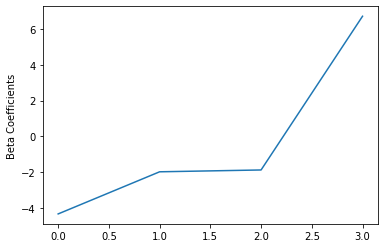

In [70]:
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

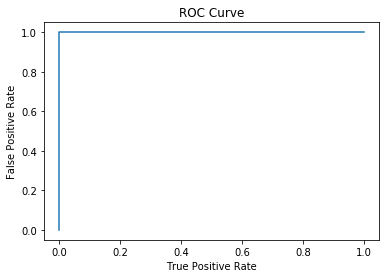

Training set areaUnderROC: 1.0


In [71]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

In [73]:
predictions = lrModel.transform(test)
predictions.select( 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+-----+--------------------+----------+--------------------+
|label|       rawPrediction|prediction|         probability|
+-----+--------------------+----------+--------------------+
|  0.0|[5.41780736512734...|       0.0|[0.99558273439474...|
|  0.0|[4.10153192360585...|       0.0|[0.98372204947537...|
|  0.0|[6.83001142530192...|       0.0|[0.99892032119772...|
|  0.0|[5.11843977956498...|       0.0|[0.99405025723167...|
|  0.0|[5.79600608077419...|       0.0|[0.99696954086442...|
|  0.0|[11.7193049708853...|       0.0|[0.99999186482337...|
|  0.0|[9.45875973843646...|       0.0|[0.99992200280852...|
|  0.0|[10.7934638179698...|       0.0|[0.99997946714662...|
|  0.0|[9.05145944372924...|       0.0|[0.99988279390261...|
|  0.0|[4.90123878511778...|       0.0|[0.99261754196212...|
+-----+--------------------+----------+--------------------+
only showing top 10 rows



In [75]:
predictions.groupby('label').pivot('prediction').count().show()

+-----+----+----+
|label| 0.0| 1.0|
+-----+----+----+
|  0.0|  26|null|
|  1.0|null|  15|
+-----+----+----+



In [0]:
#Вывод - 100% точность при прогнозе Setosa против Not Setosa на тестовых данных.